# 📂 Python 파일 입출력 실습

이 노트북에서는 Python을 사용하여 다양한 형식의 파일(TEXT, CSV, NPY, JSON, 이미지)을 읽고 쓰는 방법을 배웁니다.

In [1]:
# 폴더 생성 함수
import os 

def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"폴더가 생성되었습니다.: {folder_path}")
    else:
        print(f"폴더가 이미 존재합니다: {folder_path}")

folder_path = "../data/test_data/"
create_folder(folder_path)

폴더가 생성되었습니다.: ../data/test_data/


### 1. TEXT 파일 다루기
Python의 `open()` 함수를 이용하여 텍스트 파일을 읽고 쓸 수 있습니다.

In [ ]:
# 텍스트 파일 쓰기(f.write)
with open(os.path.join(folder_path, "text_file.txt"), "w", encoding="utf-8") as f:
    f.write("텍스트 파일 테스트입니다..\n")
    f.write("파이썬의 open()함수를 활용하였습니다..\n")
    print("### open()함수로 text파일을 저장하였습니다.")


### open()함수로 text파일을 저장하였습니다.
### open()함수로 text파일을 읽었습니다.
TEXT 파일 내용: ['텍스트 파일 테스트입니다..\n', '파이썬의 open()함수를 활용하였습니다..\n']


In [5]:
# 텍스트 파일 쓰기(f.write)

lines = ['안녕하세요',
         '반갑습니다',
         ]

with open(os.path.join(folder_path, "write_text_file.txt"), "w", encoding="utf-8") as f:
    f.writelines(lines)


In [3]:

# 텍스트 파일 읽기(readlines)
with open(os.path.join(folder_path, "text_file.txt"), "r", encoding="utf-8") as f:
    text_content = f.readlines() # '\n' 기준 리스트로 분리해서 읽음
    print("### open()함수로 text파일을 읽었습니다.")
print("TEXT 파일 내용:", text_content)

### open()함수로 text파일을 읽었습니다.
TEXT 파일 내용: ['텍스트 파일 테스트입니다..\n', '파이썬의 open()함수를 활용하였습니다..\n']


In [4]:

# 텍스트 파일 읽기(read)
with open(os.path.join(folder_path, "text_file.txt"), "r", encoding="utf-8") as f:
    text_content = f.read() # '\n' 기준 리스트로 분리해서 읽음
    print("### open()함수로 text파일을 읽었습니다.")
print("TEXT 파일 내용:", text_content)

### open()함수로 text파일을 읽었습니다.
TEXT 파일 내용: 텍스트 파일 테스트입니다..
파이썬의 open()함수를 활용하였습니다..



### 2. CSV 파일 다루기 (open() + csv 모듈 사용)
Python의 `csv` 모듈을 사용하여 CSV 파일을 쉽게 다룰 수 있습니다.

In [7]:
import csv

# CSV 파일 쓰기
with open(os.path.join(folder_path, "open_csv.csv"), mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["이름", "나이", "국가"])
    writer.writerow(["홍길동", 25, "한국"])
    writer.writerow(["Alice", 30, "미국"])
    writer.writerow(["Bob", 22, "영국"])
print("### open_csv.csv 파일이 생성되었습니다!")


### open_csv.csv 파일이 생성되었습니다!


In [8]:

# CSV 파일 읽기
with open(folder_path + 'open_csv.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    print("### open_csv.csv 파일을 읽었습니다!")
    for row in reader:
        print(row)

### open_csv.csv 파일을 읽었습니다!
['이름', '나이', '국가']
['홍길동', '25', '한국']
['Alice', '30', '미국']
['Bob', '22', '영국']


In [9]:
f = open(folder_path + 'open_csv.csv', mode='r', encoding='utf-8')

reader = csv.reader(f)
f.close()

### 3️. CSV 파일 다루기 (NumPy 사용)
NumPy의 `savetxt()`와 `loadtxt()`를 사용하여 CSV 파일을 저장하고 불러올 수 있습니다.

In [12]:
import numpy as np

# CSV 파일 쓰기 (numpy.savetxt)
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np.savetxt(folder_path + "np_savetxt.csv", data, delimiter=",", fmt="%d")
print("### np_savetxt.csv 파일이 생성되었습니다!")

# CSV 파일 읽기 (numpy.loadtxt)
data_loaded = np.loadtxt(folder_path + "np_savetxt.csv", delimiter=",", dtype=int)
print("### np_savetxt.csv 파일을 읽었습니다!")
print("CSV File Content:\n", data_loaded)
data_loaded

### np_savetxt.csv 파일이 생성되었습니다!
### np_savetxt.csv 파일을 읽었습니다!
CSV File Content:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### 4️. CSV 파일 다루기 (Pandas 사용)
Pandas를 사용하면 CSV 데이터를 쉽게 저장하고 로드할 수 있습니다.

In [11]:
import pandas as pd

# 데이터 생성
data = {
    "이름": ["홍길동", "Alice", "Bob"],
    "나이": [25, 30, 22],
    "국가": ["한국", "미국", "영국"]
}
df = pd.DataFrame(data)

# CSV 파일 저장
df.to_csv(folder_path + "pandas_csv.csv", index=False, encoding="utf-8")
print("### pandas_csv.csv 파일이 생성되었습니다!")

# CSV 파일 읽기
df_read = pd.read_csv(folder_path + "pandas_csv.csv", encoding="utf-8")
print("### pandas_csv.csv 파일을 읽었습니다!")
df_read

### pandas_csv.csv 파일이 생성되었습니다!
### pandas_csv.csv 파일을 읽었습니다!


,이름,나이,국가
0,홍길동,25,한국
1,Alice,30,미국
2,Bob,22,영국


## 5️. JSON 파일 다루기
Python의 `json` 모듈을 사용하여 JSON 데이터를 쉽게 저장하고 로드할 수 있습니다.

In [10]:
import json

json_data = {"name": "Alice", "age": 25, "city": "New York"}

# JSON 파일 저장
with open(folder_path + "example.json", "w", encoding="utf-8") as f:
    json.dump(json_data, f, indent=4, ensure_ascii=False)
    print("### example.json 파일을 저장하였습니다!")

# JSON 파일 로드
with open(folder_path + "example.json", "r", encoding="utf-8") as f:
    json_loaded = json.load(f)
    print("### example.json 파일을 읽었습니다!")
print("JSON File Content:\n", json_loaded)

### example.json 파일을 저장하였습니다!
### example.json 파일을 읽었습니다!
JSON File Content:
 {'name': 'Alice', 'age': 25, 'city': 'New York'}


## 6️. 인터넷에서 이미지 다운로드 및 저장하기
Python의 `requests` 모듈을 사용하여 인터넷에서 이미지를 다운로드하고 파일로 저장할 수 있습니다.

In [13]:
import requests
## urllib.request를 대신 쓰기도 함

# image_url = "https://commons.wikimedia.org/wiki/File:The_Blue_Marble_(remastered).jpg"  # 샘플 이미지 URL
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuUjubkCFJVNUrpWlMYXjvuftHjfW40z62Eg&s"
image_response = requests.get(image_url)

if image_response.status_code == 200:
    with open(folder_path + "downloaded_image.jpg", "wb") as img_file:
        img_file.write(image_response.content)
    print("### 이미지 파일이 저장되었습니다! (downloaded_image.jpg)")
else:
    print("@@@ 이미지 다운로드 실패!")

### 이미지 파일이 저장되었습니다! (downloaded_image.jpg)


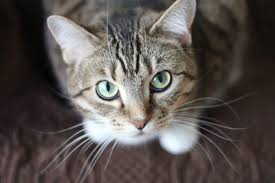

In [14]:
from PIL import Image
Image.open('../data/test_data/downloaded_image.jpg')

#### 파일 다루는 방법 비교
| 방법 | 장점 | 단점 |
|------|------|------|
| `open()` + `csv` | 기본 내장 기능으로 가볍고 사용 가능 | 속도가 느리고 대량 데이터 처리 어려움 |
| `NumPy` | 빠른 연산 가능, 숫자 데이터에 적합 | 문자열 처리 어려움 |
| `Pandas` | 강력한 데이터 처리 및 분석 기능 제공 | pandas 설치 필요, 메모리 사용 높을 수 있음 |

